# Case Study on Network Intrusion Detection
The dataset to be audited was provided which consists of a wide variety of intrusions simulated in a military network environment. It created an environment to acquire raw TCP/IP dump data for a network by simulating a typical US Air Force LAN. The LAN was focused like a real environment and blasted with multiple attacks. A connection is a sequence of TCP packets starting and ending at some time duration between which data flows to and from a source IP address to a target IP address under some well-defined protocol. Also, each connection is labelled as either normal or as an attack with exactly one specific attack type. Each connection record consists of about 100 bytes.

For each TCP/IP connection, 41 quantitative and qualitative features are obtained from normal and attack data (3 qualitative and 38 quantitative features) .The class variable has two categories:
- Normal 
- Anomalous

In [91]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn

# Settings
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (16, 6)

## Step 1: Load Train & Test Dataset 

In [2]:
# Load Network Intrusion Detection train dataset
train_url = 'https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/Network_Intrusion_Train_data.csv'
nwid_train_org = pd.read_csv(train_url)

# Load Network Intrusion Detection test dataset
test_url = 'https://raw.githubusercontent.com/anup-jana/Python-Machine-Learning/master/Datasets/Network_Intrusion_Validate_data.csv'
nwid_test_org = pd.read_csv(test_url)

## Step 2: Check Dimension of Dataset

In [3]:
# train set dimension
print('Train set dimension: {} rows, {} columns'.format(nwid_train_org.shape[0], nwid_train_org.shape[1]))

# View train data
nwid_train_org.head()

Train set dimension: 25192 rows, 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
# test set dimension
print('Train set dimension: {} rows, {} columns'.format(nwid_test_org.shape[0], nwid_test_org.shape[1]))

# View test data
nwid_test_org.head()

Train set dimension: 22544 rows, 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


## Step 3: Descriptive Statistics of Train Dataset

In [5]:
# Descriptive statistics
nwid_train_org.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Pre-Processing Train & Test Dataset

In [6]:
# look for missing values
print('Missing values in train dataset: \n',nwid_train_org.isnull().sum())

print('\nMissing values in test dataset: \n',nwid_test_org.isnull().sum())

Missing values in train dataset: 
 duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv

In [7]:
# List of Categorical variables 
print('Categorical variables of train dataset: \n',nwid_train_org.select_dtypes(include=['object']).columns.values)
print('\nCategorical variables of train dataset: \n',nwid_test_org.select_dtypes(include=['object']).columns.values)

Categorical variables of train dataset: 
 ['protocol_type' 'service' 'flag' 'class']

Categorical variables of train dataset: 
 ['protocol_type' 'service' 'flag' 'class']


In [8]:
# Get frequency count of values for Protocol_Type feature

protocol_train_tab = pd.crosstab(index=nwid_train_org['protocol_type'], columns='count')
print('Unique values and frequency count for train dataset Protocol Type feature variable: \n', protocol_train_tab)

protocol_test_tab = pd.crosstab(index=nwid_test_org['protocol_type'], columns='count')
print('\nUnique values and frequency count for test dataset Protocol Type feature variable: \n', protocol_test_tab)

train_protocol_list = list(protocol_train_tab.index)
test_protocol_list = list(protocol_test_tab.index)
print('Difference between train & test dataset Protocol Type values :', list(set(train_protocol_list) - set(test_protocol_list)))

Unique values and frequency count for train dataset Protocol Type feature variable: 
 col_0          count
protocol_type       
icmp            1655
tcp            20526
udp             3011

Unique values and frequency count for test dataset Protocol Type feature variable: 
 col_0          count
protocol_type       
icmp            1043
tcp            18880
udp             2621
Difference between train & test dataset Protocol Type values : []


In [9]:
# Get frequency count of values for Flag feature

flag_train_tab = pd.crosstab(index=nwid_train_org['flag'], columns='count')
print('Unique values and frequency count for train dataset Flag feature variable: \n', flag_train_tab)

flag_test_tab = pd.crosstab(index=nwid_test_org['flag'], columns='count')
print('\nUnique values and frequency count for test dataset Flag feature variable: \n', flag_test_tab)

train_flag_list = list(flag_train_tab.index)
test_flag_list = list(flag_test_tab.index)
print('\nDifference between train & test dataset Flag values :', list(set(flag_train_tab) - set(flag_test_tab)))

Unique values and frequency count for train dataset Flag feature variable: 
 col_0   count
flag         
OTH         5
REJ      2216
RSTO      304
RSTOS0     21
RSTR      497
S0       7009
S1         88
S2         21
S3         15
SF      14973
SH         43

Unique values and frequency count for test dataset Flag feature variable: 
 col_0   count
flag         
OTH         4
REJ      3850
RSTO      773
RSTOS0      2
RSTR      669
S0       2013
S1         21
S2         15
S3        249
SF      14875
SH         73

Difference between train & test dataset Flag values : []


In [10]:
# Get frequency count of values for Service feature

service_train_tab = pd.crosstab(index=nwid_train_org['service'], columns='count')
print('Unique values and frequency count for train dataset Service feature variable: \n', service_train_tab.sort_values(by='count'))

service_test_tab = pd.crosstab(index=nwid_test_org['service'], columns='count')
print('\nUnique values and frequency count for test dataset Service feature variable: \n', service_test_tab.sort_values(by='count'))

train_service_list = list(service_train_tab.index)
test_service_list = list(service_test_tab.index)
print('\nDifference between train & test dataset Service values :', list(set(train_service_list) - set(test_service_list)))

Unique values and frequency count for train dataset Service feature variable: 
 col_0        count
service           
http_8001        1
tim_i            2
pm_dump          3
red_i            3
urh_i            4
shell           11
printer         12
pop_2           17
remote_job      17
rje             20
X11             22
ntp_u           32
IRC             40
sql_net         46
pop_3           53
ssh             58
nntp            61
echo            65
sunrpc          67
netbios_ssn     67
kshell          67
netbios_ns      76
netstat         78
login           79
netbios_dgm     85
link            85
systat          88
ldap            90
mtp             90
exec            91
...            ...
gopher         109
domain         109
efs            110
csnet_ns       111
http_443       113
supdup         114
nnsp           123
urp_i          124
ctf            127
iso_tsap       131
uucp_path      133
imap4          138
whois          145
bgp            146
time           155
uucp    

         class  frequency_percent_train  class  frequency_percent_test
anomaly  11743                    46.61  12833                   56.92
normal   13449                    53.39   9711                   43.08


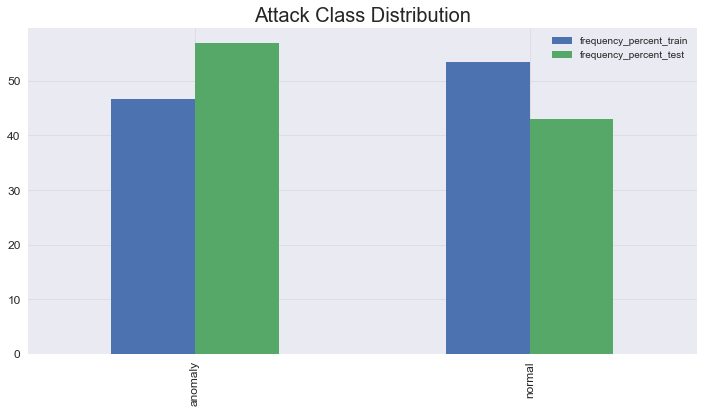

In [11]:
# Class target variable Distribution
class_freq_train = nwid_train_org[['class']].apply(lambda x: x.value_counts())
class_freq_test = nwid_test_org[['class']].apply(lambda x: x.value_counts())
class_freq_train['frequency_percent_train'] = round((100 * class_freq_train / class_freq_train.sum()),2)
class_freq_test['frequency_percent_test'] = round((100 * class_freq_test / class_freq_test.sum()),2)

class_dist = pd.concat([class_freq_train, class_freq_test], axis=1) 
print(class_dist)

# Attack class bar plot
plot = class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

## Step 5: Handling Train & Test Dataset
Categorical Values and Frequency distribution of Service feature is different for test and train dataset. Also, there are some values of service feature from test dataset which are not present train dataset. There are 2 ways to handle this.
1. Compare categorical values of test dataset on train dataset. If any category is missing in test then create it with default values. If any category is present in test but missing in train then the model will automatically handle it as missing variables. However, in this case, we might miss the impartance of missing categorical value in test if not used in training the model.
2. To overcome above limitation, we can comibne both train & test dataset which will allow the model to get combinations of categorical values and hence, learning the importance of feature and model getting trained with that feature. Once, the dataset is combined, before training the model, split it into train and test using stratified technique to maintain the distribution of categorical values in both train and test dataset.

In [53]:
#Combine both train and test dataset to get complete set of values

nwid_df_org = pd.DataFrame()
nwid_df_org = nwid_df_org.append(nwid_train_org)
nwid_df_org = nwid_df_org.append(nwid_test_org)

# combined data set dimension
print('Combined Train & Test dataset dimension: {} rows, {} columns'.format(nwid_df_org.shape[0], nwid_df_org.shape[1]))

Combined Train & Test dataset dimension: 47736 rows, 42 columns


In [54]:
service_comb_tab = pd.crosstab(index=nwid_df_org['service'], columns='count')
print('Unique values and frequency count for combined dataset Service feature variable: \n', service_comb_tab.sort_values(by='count'))

Unique values and frequency count for combined dataset Service feature variable: 
 col_0        count
service           
tftp_u           1
http_8001        1
red_i            3
urh_i            4
tim_i            8
pm_dump         19
printer         23
shell           27
rje             28
pop_2           30
remote_job      31
X11             37
ntp_u           42
IRC             53
sql_net         64
nntp            82
netbios_ssn     82
ssh             84
kshell          91
echo           102
netstat        104
login          108
ldap           109
netbios_dgm    110
netbios_ns     112
klogin         113
exec           118
hostnames      119
systat         120
mtp            122
...            ...
csnet_ns       145
urp_i          147
http_443       149
vmnet          150
domain         160
nnsp           165
ctf            168
uucp_path      179
iso_tsap       179
whois          185
time           191
bgp            192
courier        204
uucp           207
Z39_50         217
sunrp

## Step 6: Stratified Split of Combined Dataset
To split the dataset by using stratified technique, we should have 2 samples per each category. We are going to split the dataset using service feature categories, however, there are some categories like <b>tftp_u and http_8001</b> which has only 1 sample. Hence, we will copy the same sample and add it over to ensure there are atleast 2 samples to split

In [55]:
# Handle categorical data with 1 sample
tftp_u_df = nwid_df_org[nwid_df_org['service'] == 'tftp_u']
http_8001_df = nwid_df_org[nwid_df_org['service'] == 'http_8001']
nwid_df_org = nwid_df_org.append(tftp_u_df)
nwid_df_org = nwid_df_org.append(http_8001_df)
nwid_df_org.reset_index(drop=True, inplace=True)

# Stratified sampling based on the service feature categorical values

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=50)
for train_index, test_index in split.split(nwid_df_org, nwid_df_org['service']):
    strat_train_set = nwid_df_org.loc[train_index]
    strat_test_set = nwid_df_org.loc[test_index]

# Print number of instances for train and test dataset
print("Stratified Sampling: ", len(strat_train_set), "train +", len(strat_test_set), "test")

Combined dataset dimension: 47738 rows, 42 columns


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## Step 7: Convert Categorical Feature into Dummy Variables

In [57]:
# create dummy variables using get_dummies function for train dataset
train_protocol_dummies = pd.get_dummies(strat_train_set.protocol_type, prefix='protocol_type')
train_flag_dummies = pd.get_dummies(strat_train_set.flag, prefix='flag')
train_service_dummies = pd.get_dummies(strat_train_set.service, prefix='service')

# concatenate the dummy variable columns onto the original DataFrame
# note: axis=0 means rows, axis=1 means columns
strat_train_set = pd.concat([strat_train_set, train_protocol_dummies], axis=1)
strat_train_set = pd.concat([strat_train_set, train_flag_dummies], axis=1)
strat_train_set = pd.concat([strat_train_set, train_service_dummies], axis=1)

strat_train_set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
24802,0,tcp,uucp_path,S0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19421,0,tcp,Z39_50,REJ,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28425,0,tcp,http,SF,276,921,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19345,0,tcp,http,REJ,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14621,0,udp,domain_u,SF,46,113,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# create dummy variables using get_dummies function for test dataset
test_protocol_dummies = pd.get_dummies(strat_test_set.protocol_type, prefix='protocol_type')
test_flag_dummies = pd.get_dummies(strat_test_set.flag, prefix='flag')
test_service_dummies = pd.get_dummies(strat_test_set.service, prefix='service')

# concatenate the dummy variable columns onto the original DataFrame
# note: axis=0 means rows, axis=1 means columns
strat_test_set = pd.concat([strat_test_set, test_protocol_dummies], axis=1)
strat_test_set = pd.concat([strat_test_set, test_flag_dummies], axis=1)
strat_test_set = pd.concat([strat_test_set, test_service_dummies], axis=1)

strat_test_set.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
3999,0,tcp,private,S0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14219,0,tcp,ftp_data,SF,4539,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23854,0,tcp,domain,SF,48,473,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17607,4,udp,private,SF,105,146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36443,0,tcp,telnet,SF,120,174,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Step 8: Separate Features and Target

In [83]:
# separate target column from encoded data and remove categorical feature for whom dummy variables were created
strat_train_set_X = strat_train_set.drop(['class', 'service', 'flag', 'protocol_type'], axis=1)
strat_test_set_X = strat_test_set.drop(['class', 'service', 'flag', 'protocol_type'], axis=1)

strat_train_set_y = strat_train_set[['class']].copy()
strat_test_set_y = strat_test_set[['class']].copy()

In [84]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# encode the target class variable
strat_train_set_y = strat_train_set_y.apply(encoder.fit_transform)
strat_test_set_y = strat_test_set_y.apply(encoder.fit_transform)

## Step 9: Identify Important Features for Training Model

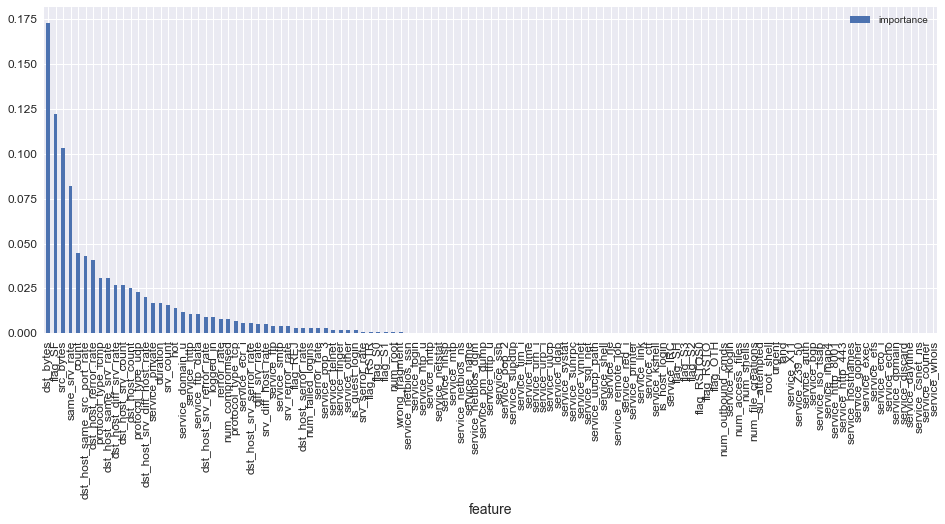

In [101]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier();

refclasscol = strat_train_set_X.columns

# fit random forest classifier on the training set
rfc_model.fit(strat_train_set_X, strat_train_set_y);

# extract important features
score = np.round(rfc_model.feature_importances_, 3)
importances = pd.DataFrame({'feature':refclasscol, 'importance':score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# plot importances
importances.plot.bar();

## Step 10: Train Random Forest Classifier with Improtant Features

In [105]:
feat_imp_threshold = importances.loc[importances['importance'] > 0]

from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score

# fit model using each importance as a threshold
thresholds = np.sort(np.unique(feat_imp_threshold.importance))
for thresh in thresholds:
    # selecting features using threshold
    selection = SelectFromModel(rfc_model, threshold=thresh, prefit=True)
    select_train_x = selection.transform(strat_train_set_X)
    
    # training model
    selection_model = RandomForestClassifier()
    selection_model.fit(select_train_x, strat_train_set_y)
    scores = cross_val_score(selection_model, select_train_x, strat_train_set_y, cv=10)
    
    # prediction through model
    select_test_x = selection.transform(strat_test_set_X)
    pred_y = selection_model.predict(select_test_x)
    
    # evaluating model
    accuracy = metrics.accuracy_score(strat_test_set_y, pred_y)
    confusion = metrics.confusion_matrix(strat_test_set_y, pred_y)
    TP = confusion[1][1]; TN = confusion[0][0]; FP = confusion[0][1]; FN = confusion[1][0];
    sensitivity = TP / float(TP + FN); specifivity = TN / float(TN + FP);
    
    print("Thresh=%.3f, n=%d, Test Accuracy: %.2f%%, Cross Val Mean Score=%.2f%%, Sensitivity=%.2f%%, Specifivity=%.2f%%" % 
          (thresh, select_train_x.shape[1], accuracy*100.0, scores.mean()*100.0, sensitivity*100.0, specifivity*100.0))


Thresh=0.001, n=46, Test Accuracy: 98.92%, Cross Val Mean Score=98.91%, Sensitivity=98.71%, Specifivity=99.11%
Thresh=0.002, n=39, Test Accuracy: 98.77%, Cross Val Mean Score=98.91%, Sensitivity=98.58%, Specifivity=98.95%
Thresh=0.003, n=37, Test Accuracy: 98.79%, Cross Val Mean Score=98.85%, Sensitivity=98.65%, Specifivity=98.92%
Thresh=0.004, n=30, Test Accuracy: 98.68%, Cross Val Mean Score=98.79%, Sensitivity=98.38%, Specifivity=98.95%
Thresh=0.005, n=29, Test Accuracy: 98.73%, Cross Val Mean Score=98.92%, Sensitivity=98.56%, Specifivity=98.89%
Thresh=0.006, n=27, Test Accuracy: 98.82%, Cross Val Mean Score=98.78%, Sensitivity=98.72%, Specifivity=98.91%
Thresh=0.007, n=25, Test Accuracy: 98.72%, Cross Val Mean Score=98.84%, Sensitivity=98.48%, Specifivity=98.95%
Thresh=0.008, n=24, Test Accuracy: 98.66%, Cross Val Mean Score=98.79%, Sensitivity=98.35%, Specifivity=98.96%
Thresh=0.009, n=22, Test Accuracy: 98.73%, Cross Val Mean Score=98.76%, Sensitivity=98.52%, Specifivity=98.92%
T

If you can observe, n = 21 to 27 i.e. threshold = 0.011 to 0.005 best fits the model considering all evaluation metrics.